# Smog Analysis (PM 2.5)

This is a MVP, lots of things can be done or in a better way.

The goal here is to compare time-series smog levels for some cities (Kraków, Warszawa, Gdańsk, Poznań) along 2016, from the perspective of the residents' everyday life. In other words:
 - in what cities it can be more dangerous to take a simple walk on the street?
 - in what cities are we more often restricted to stay indoors? 
 
The analysis considers as dangerous all measurements above `smog_tolerance`.

Based on data provided by the Główny Inspektorat Ochrony Środowiska.
http://powietrze.gios.gov.pl/pjp/archives/downloadFile/242


Todo:
 - Separate analysis for day & evening
 - Show results for different values of `smog_tolerance`
 - Rename features to match city names more user-friendly
 - Use mean() or max() of different measure devices in the same city


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [17]:
cfg = {
    'smog_tolerance': 45
}

In [18]:
xlsx = pd.read_excel('2016_PM2.5_1g.xlsx')
# last row is 2017
xlsx = xlsx[:-1]
xlsx.head(10)

,1,2,3,4,5,6,7,8,9,10,...,34,35,36,37,38,39,40,41,42,43
NaN,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpToruDziewu,LbLubObywate,LdLodzCzerni,LdLodzGdansk,LdZgieMielcz,...,SkMalo11List,SkPolaRuszcz,SlGliwicMewy,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,WpPoznPolank,ZpSzczAndr01,ZpSzczPils02
NaN,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
NaN,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
NaN,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
Czas pomiaru,DsJelGorOgin-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpToruDziewu-PM2.5-1g,LbLubObywate-PM2.5-1g,LdLodzCzerni-PM2.5-1g,LdLodzGdansk-PM2.5-1g,LdZgieMielcz-PM2.5-1g,...,SkMalo11List-PM2.5-1g,SkPolaRuszcz-PM2.5-1g,SlGliwicMewy-PM2.5-1g,SlKatoKossut-PM2.5-1g,SlZlotPotLes-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpPoznPolank-PM2.5-1g,ZpSzczAndr01-PM2.5-1g,ZpSzczPils02-PM2.5-1g
2016-01-01 01:00:00,"21,0","311,827","233,76","235,9",NaN,NaN,"241,3834",NaN,NaN,NaN,...,"43,9","135,1","142,856","209,965","48,6769","58,5977","341,065","68,0","78,9016","77,6332"
2016-01-01 02:00:00,"23,856","154,281","81,7649",NaN,"176,9",NaN,"378,9304","87,465","125,0","110,0",...,"40,3","144,0","101,477","238,146","49,0558","91,1037","123,545","79,2165","190,152","151,912"
2016-01-01 03:00:00,"24,4845","95,6239","67,1229","81,4","68,6",NaN,"203,3238","63,798","65,0","56,0",...,"48,2","87,9","114,013","277,883","52,4854","33,6417","91,26","116,65","78,2346","39,3468"
2016-01-01 04:00:00,"29,6","71,4168","61,2146",NaN,"58,4",NaN,"112,0202","62,769","68,0","49,0",...,"51,0","86,5","96,9653","271,435","50,9501","30,7289","88,4145","115,133","42,1986","33,441"
2016-01-01 05:00:00,"25,5768","53,9496","54,6931","63,9","54,6",NaN,"85,4968","65,856","65,0","43,0",...,"53,6","94,6","82,7186","172,066","56,2641","31,519","83,4373","110,07","28,9183","37,0143"


# Obtain only relevant data

In [19]:
df = pd.DataFrame(xlsx.iloc[5:,:].values, columns=xlsx.iloc[0,:].values, index=xlsx.index[5:])\
    .apply(lambda x: x.str.replace(',','.'))\
    .astype('float32')
target = ['MpKrakBujaka', 'MzWarAlNiepo', 'PmGdaLeczk08', 'WpPoznPolank']
target_columns = filter(lambda loc: any(t in loc for t in target), list(df.columns.values))
df[target_columns]

df.index = pd.to_datetime(df.index)

# drop measurements between 2am - 5am, (almost) nobody wants to walks on the street at this time!
df = df[df.index.map(lambda ix: ix.hour <= 2 or ix.hour >= 6).values]

# Daily max smog levels

In [20]:
max_day = df.groupby(lambda x: datetime(x.year, x.month, x.day)).max()
max_day[target_columns]

,MpKrakBujaka,MzWarAlNiepo,PmGdaLeczk08,WpPoznPolank
2016-01-01,266.600006,87.681015,98.423103,106.898003
2016-01-02,57.500000,31.020954,12.721700,86.216103
2016-01-03,75.699997,NaN,24.501101,45.123001
2016-01-04,94.508499,55.334042,36.169998,70.930000
2016-01-05,182.416000,106.285812,63.087200,95.610001
2016-01-06,178.815994,91.909378,73.902802,109.809998
2016-01-07,117.310997,69.604767,33.891701,97.245003
2016-01-08,82.907501,74.678802,54.711399,84.900002
2016-01-09,124.411003,66.116364,80.913300,40.830002
2016-01-10,85.207703,71.507530,47.770802,116.379997


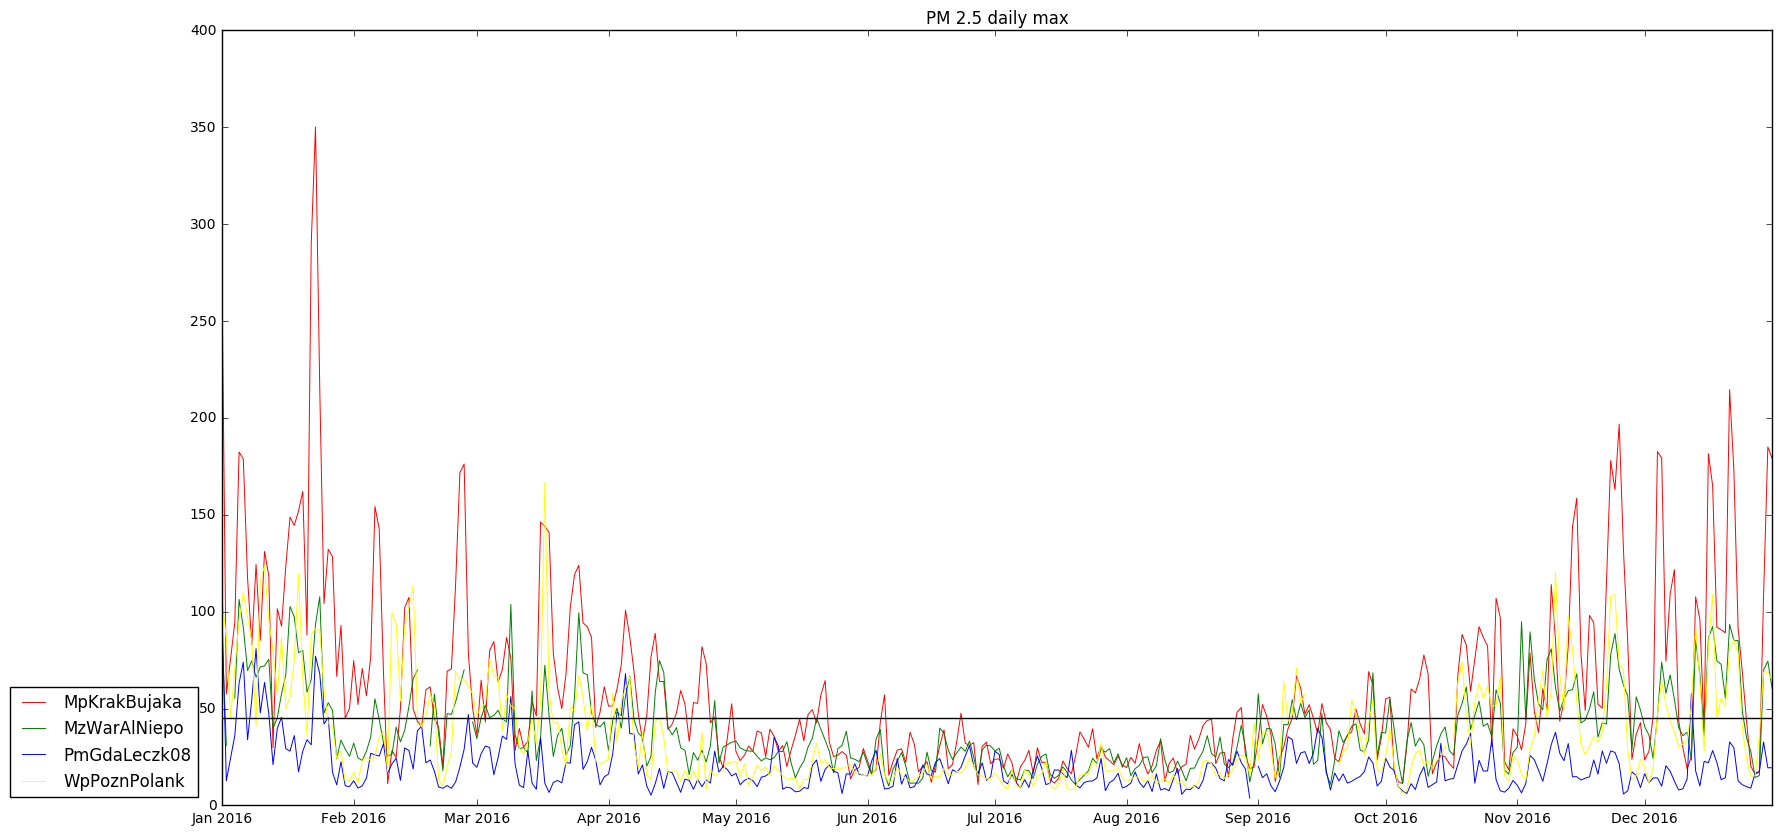

In [21]:
def plot(first_perc, last_perc, df, series):    
    plt.figure(figsize=(20,10))
    first = int(len(max_day) * first_perc)
    last = int(len(max_day) * last_perc)
    x = df.index.values[first:last]
    for (name, color) in series:
        y = df[name].iloc[first:last].values
        plt.plot_date(x=x, y=y, fmt="r-", linewidth=0.7, c=color, label=name)
    plt.title("PM 2.5 daily max")
    plt.axhline(y=cfg['smog_tolerance'], color='black', linestyle='-')    
    plt.legend(bbox_to_anchor=(-0.01,0), loc="lower right")
    plt.show()
    
plot(0, 1.0, max_day, [
        ('MpKrakBujaka', 'red'),
        ('MzWarAlNiepo', 'green'),
        ('PmGdaLeczk08', 'blue'),
        ('WpPoznPolank', 'yellow')
    ])

# Dangerous hours percentage per month

In [22]:
danger_hours_per_month = df[target_columns].apply(lambda x: x > cfg['smog_tolerance']).groupby(lambda x: datetime(x.year, x.month, 1))
danger_hours_per_month = danger_hours_per_month.sum() / danger_hours_per_month.count() * 100
danger_hours_per_month[target_columns]

,MpKrakBujaka,MzWarAlNiepo,PmGdaLeczk08,WpPoznPolank
2016-01-01,58.461538,42.769231,8.461538,41.538462
2016-02-01,18.719212,10.837438,0.164204,18.555008
2016-03-01,19.662058,11.213518,0.307220,19.508449
2016-04-01,15.714286,7.619048,1.587302,4.603175
2016-05-01,1.075269,0.153610,0.000000,0.000000
2016-06-01,0.476190,0.000000,0.000000,0.000000
2016-07-01,0.000000,0.000000,0.000000,0.000000
2016-08-01,0.460829,0.000000,0.000000,0.000000
2016-09-01,3.968254,4.603175,0.000000,5.873016
2016-10-01,12.135177,7.834101,0.000000,8.602151


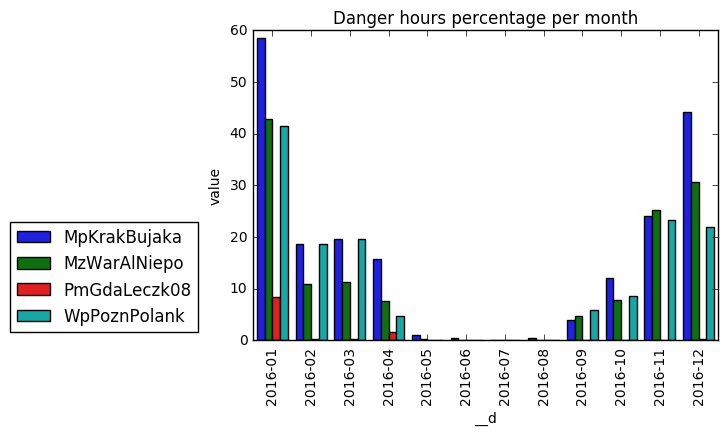

In [23]:
def plot_bar_grouped(df, title=None):
    clone = df.copy()
    clone['__d'] = clone.index.strftime('%Y-%m')    
    melted = pd.melt(clone, id_vars=['__d'])
    sns.barplot(x='__d', y='value', hue='variable', data=melted)
    plt.legend(bbox_to_anchor=(-0.1,0), loc="lower right")
    plt.xticks(rotation=90)
    if (title):
        plt.title(title)

plot_bar_grouped(danger_hours_per_month[target_columns], title="Danger hours percentage per month")

# Dangerous day max percentage per month

In [24]:
days_with_dangerous_max = max_day.apply(lambda x: x > cfg['smog_tolerance']).groupby(lambda x: datetime(x.year, x.month, 1))
days_with_dangerous_max = days_with_dangerous_max.sum() / days_with_dangerous_max.count() * 100
days_with_dangerous_max[target_columns]

,MpKrakBujaka,MzWarAlNiepo,PmGdaLeczk08,WpPoznPolank
2016-01-01,96.774194,77.419355,38.709677,74.193548
2016-02-01,72.413793,34.482759,3.448276,51.724138
2016-03-01,77.419355,45.161290,3.225806,54.838710
2016-04-01,73.333333,23.333333,10.000000,13.333333
2016-05-01,12.903226,3.225806,0.000000,0.000000
2016-06-01,6.666667,0.000000,0.000000,0.000000
2016-07-01,0.000000,0.000000,0.000000,0.000000
2016-08-01,6.451613,0.000000,0.000000,0.000000
2016-09-01,36.666667,23.333333,0.000000,26.666667
2016-10-01,54.838710,25.806452,0.000000,32.258065


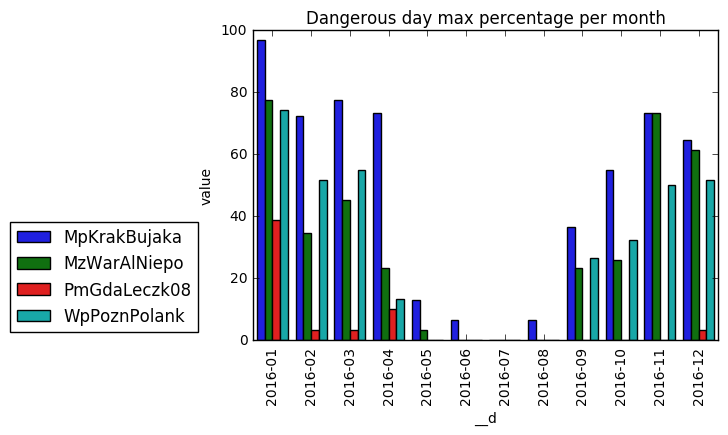

In [25]:
plot_bar_grouped(days_with_dangerous_max[target_columns], title='Dangerous day max percentage per month')